# Título: Aprendizaje de Máquina para el Análisis del Rendimiento de Ventas en Comercio Electrónico

Nombre: Santiago Ajala Ramos

Objetivos:


1.   Algoritmos de aprendizaje automático: Utilizar algoritmos de aprendizaje
automático para el análisis de datos de comercio
2.   Clasificación de clientes: Clasificación de clientes en varias categorías
3.  Segmentación de Clientes: Utilizar técnicas de agrupamiento para segmentar
a los clientes basándose en su comportamiento de compra.
4. Predicción de Ventas: Desarrollar un modelo predictivo para pronosticar ventas futuras basándose en datos históricos.

# Parte 0: Preparación

## Exploración y limpieza de Datos

In [49]:
#Librerias
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.cluster import MeanShift
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [3]:
#Conectar al Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Leer dataset
df_1 = pd.read_excel('/content/drive/MyDrive/Maestría Ciencia de Datos/Fundamentos Ciencia de Datos/online_retail_II.xlsx',
                   sheet_name='Year 2009-2010')
df_2 = pd.read_excel('/content/drive/MyDrive/Maestría Ciencia de Datos/Fundamentos Ciencia de Datos/online_retail_II.xlsx',
                   sheet_name='Year 2010-2011')

In [5]:
#Unird los df
df = pd.concat([df_1, df_2], ignore_index=True)

In [6]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
#Imprimir tipo de datos
df.dtypes

,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
Price,float64
Customer ID,float64
Country,object


In [8]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [9]:
#Cambiar a entero la variables CustomerID
df["Customer ID"] = pd.to_numeric(df["Customer ID"], errors='coerce')
df["Customer ID"] = df["Customer ID"].astype('Int64')

In [10]:
#Cambiar el tipo de dato a la columna Customer1D
df["Invoice"]=df["Invoice"].astype('string')
df["StockCode"]=df["StockCode"].astype('string')
df["Description"]=df["Description"].astype('string')
df["Country"]=df["Country"].astype('string')
df["Customer ID"]=df["Customer ID"].astype('string')
#df["InvoiceDate"]=df["InvoiceDate"].astype(date)
print("\n Tipo de datos despues:\n",df.dtypes)


 Tipo de datos despues:
 Invoice        string[python]
StockCode      string[python]
Description    string[python]
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID    string[python]
Country        string[python]
dtype: object


In [11]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [12]:
def null_values(df):
    for col in df.columns:
        if df[col].isnull().any():
            print(f"La columna {col} tiene valores nulos")
        else:
            print(f"La columna {col} no tiene valores nulos")

print("\n Columnas antes de eliminar valores faltantes")
null_values(df)


 Columnas antes de eliminar valores faltantes
La columna Invoice no tiene valores nulos
La columna StockCode no tiene valores nulos
La columna Description tiene valores nulos
La columna Quantity no tiene valores nulos
La columna InvoiceDate no tiene valores nulos
La columna Price no tiene valores nulos
La columna Customer ID tiene valores nulos
La columna Country no tiene valores nulos


In [13]:
#Eliminar valores nulos en la columna Customer ID
df = df.dropna(subset=['Customer ID'])
print("Columnas despues de eliminar valores faltantes")
null_values(df)

Columnas despues de eliminar valores faltantes
La columna Invoice no tiene valores nulos
La columna StockCode no tiene valores nulos
La columna Description no tiene valores nulos
La columna Quantity no tiene valores nulos
La columna InvoiceDate no tiene valores nulos
La columna Price no tiene valores nulos
La columna Customer ID no tiene valores nulos
La columna Country no tiene valores nulos


In [14]:
#Redondear a dos decimales la variables UnitPrice
df.loc[:,'Price'] = df['Price'].round(2)

In [15]:
#Filtras Quantity > 0 o UnitPrice >0
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)].reset_index(drop=True)

In [16]:
#Verificar si hay transacciones canceladas
count = df['Invoice'].str.startswith('C', na=False).sum()
print(f"Hay {count} registros en 'InvoiceNo' que empiezan con 'C'.")

Hay 0 registros en 'InvoiceNo' que empiezan con 'C'.


In [17]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
805526,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
805527,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
805528,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
805529,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [18]:
#Pasar a mayusculas la columna Description
df['Description'] = df['Description'].str.upper()

In [19]:
#Eliminar espacios en blanco al inicio y al final de las columnas de tipo string
df = df.apply(lambda x: x.str.strip() if x.dtype == "string[python]" else x)

In [20]:
#Min Quantity
print(df['Quantity'].min())
# Max Quantity
print(df['Quantity'].max())

1
80995


In [21]:
#Ver registros donde quanity es igual a 80995
df[df['Quantity'] == 80995]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
805057,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


In [22]:
# Min UnitPrice
print(df['Price'].min())
# Max UnitPrice
print(df['Price'].max())

0.03
10953.5


In [23]:
# Min InvoiceDate
print(df['InvoiceDate'].min())
# Max InvoiceDate
print(df['InvoiceDate'].max())

2009-12-01 07:45:00
2011-12-09 12:50:00


In [24]:
#Tamanio del dataset
df.shape


(805531, 8)

## Análisis Exploratorio de Datos

In [25]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

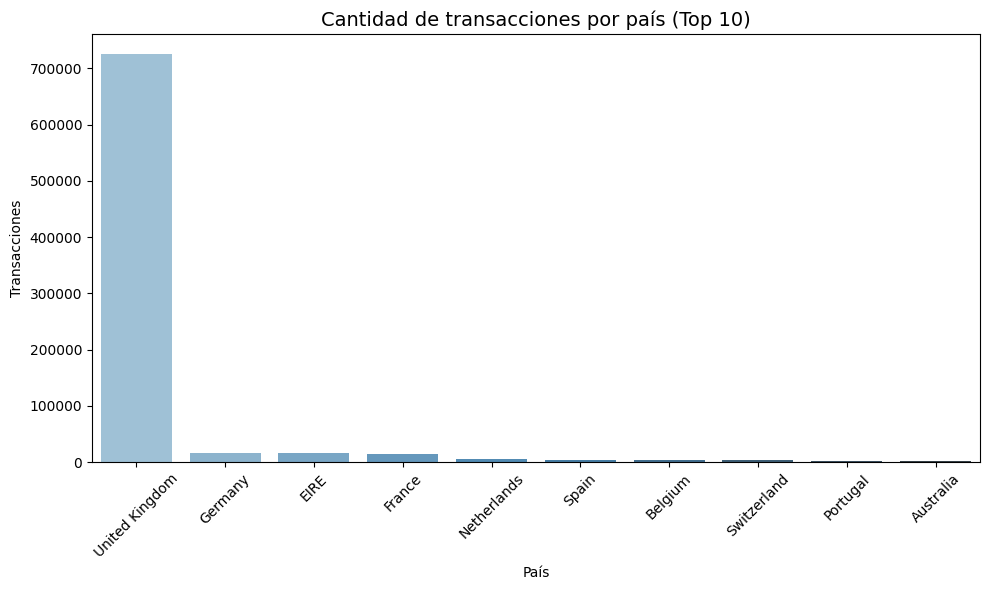

In [ ]:
# Top 10 países por número de transacciones
ventas_por_pais = df.groupby('Country')['Invoice'].count().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_por_pais, x='Country', y='Invoice', hue='Country', palette='Blues_d', legend=False)
plt.title('Cantidad de transacciones por país (Top 10)', fontsize=14)
plt.xlabel('País')
plt.ylabel('Transacciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ventas_por_pais.png')
plt.show()


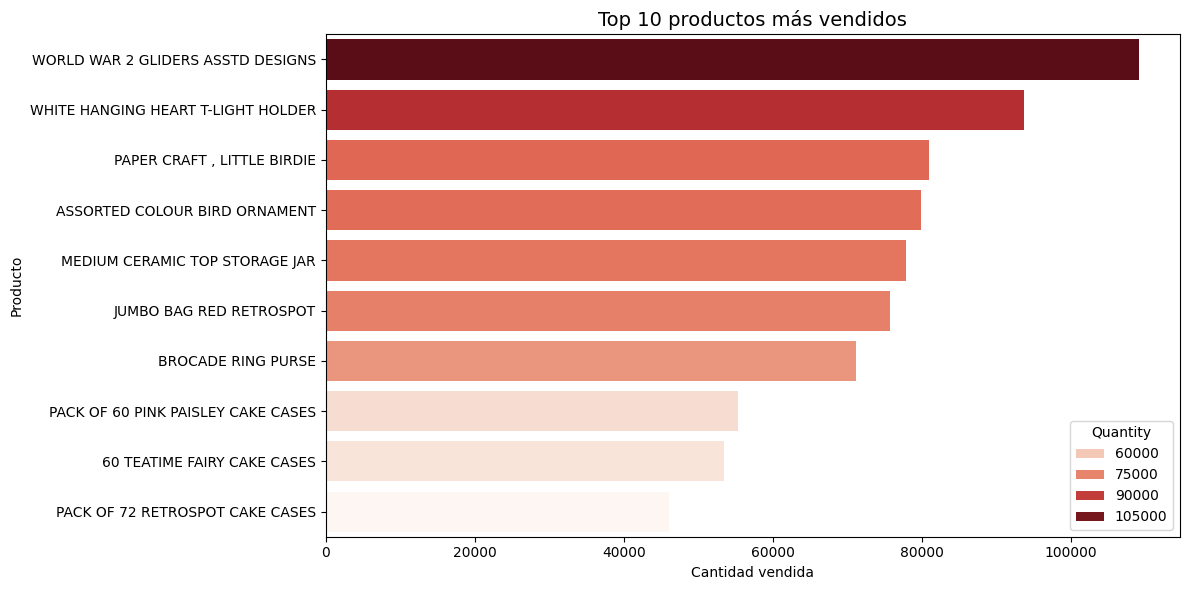

In [ ]:
#2.- Top 10 productos más vendidos (por cantidad)

producto_mas_vendidos = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=producto_mas_vendidos, x='Quantity', y='Description', hue='Quantity', palette='Reds')
plt.title('Top 10 productos más vendidos', fontsize=14)
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.savefig('distribucion_cantidad_productos.png')
plt.show()

In [ ]:
producto_mas_vendidos

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,109169
1,WHITE HANGING HEART T-LIGHT HOLDER,93640
2,"PAPER CRAFT , LITTLE BIRDIE",80995
3,ASSORTED COLOUR BIRD ORNAMENT,79913
4,MEDIUM CERAMIC TOP STORAGE JAR,77916
5,JUMBO BAG RED RETROSPOT,75759
6,BROCADE RING PURSE,71129
7,PACK OF 60 PINK PAISLEY CAKE CASES,55270
8,60 TEATIME FAIRY CAKE CASES,53495
9,PACK OF 72 RETROSPOT CAKE CASES,46107


In [ ]:
#Ver registros con descipcion igual a WORLD WAR 2 GLIDERS ASSTD DESIGNS
df[df['Description'] == 'WORLD WAR 2 GLIDERS ASSTD DESIGNS']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1199,489561,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2009-12-01 12:57:00,0.21,14654,United Kingdom
2515,489723,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,2009-12-02 10:58:00,0.18,14299,United Kingdom
3155,489802,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,3,2009-12-02 12:32:00,0.21,15581,United Kingdom
3490,489816,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2009-12-02 13:20:00,0.21,16086,United Kingdom
3501,489819,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,96,2009-12-02 13:23:00,0.21,14739,United Kingdom
...,...,...,...,...,...,...,...,...
801106,581129,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-07 12:48:00,0.29,15498,United Kingdom
801868,581171,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-07 15:02:00,0.29,12615,France
803556,581403,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-08 13:46:00,0.29,13510,United Kingdom
804146,581419,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,2011-12-08 15:03:00,0.21,15484,United Kingdom


In [ ]:
df["Price"].describe()

,Price
count,805531.000000
mean,3.206633
std,29.199495
min,0.030000
25%,1.250000
50%,1.950000
75%,3.750000
max,10953.500000


In [ ]:
df['Quantity'].describe()

,Quantity
count,805531.000000
mean,13.290797
std,143.635681
min,1.000000
25%,2.000000
50%,5.000000
75%,12.000000
max,80995.000000


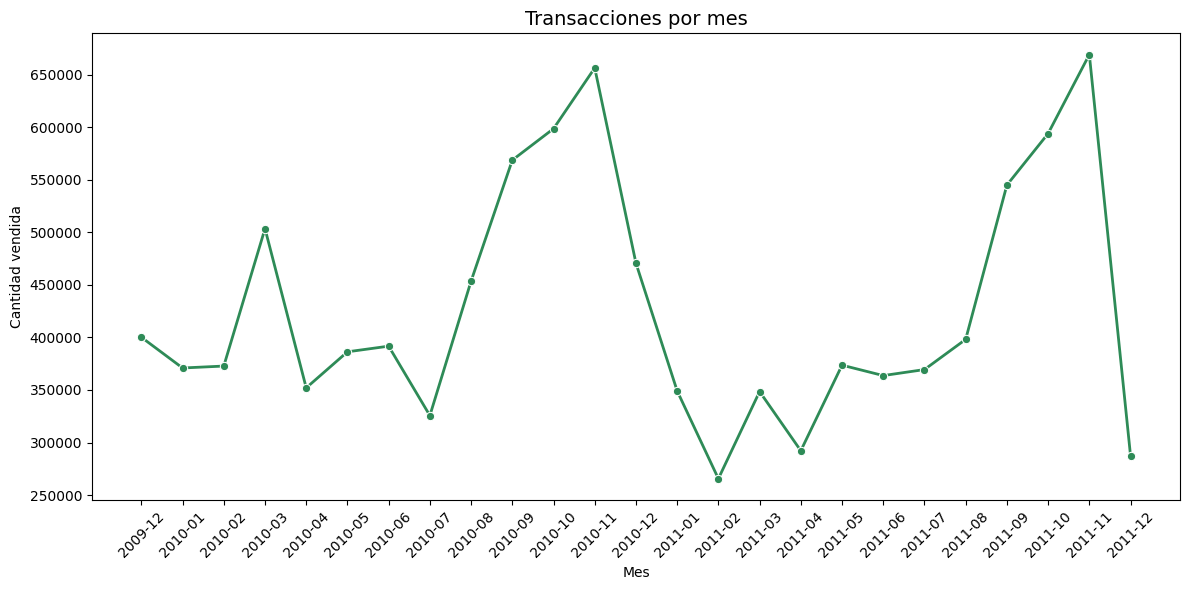

In [ ]:
#3.- Ventas por mes
ventas_por_mes=df.copy()
ventas_por_mes['Mes'] = ventas_por_mes['InvoiceDate'].dt.to_period('M')
ventas_por_mes = ventas_por_mes.groupby('Mes')['Quantity'].sum().reset_index()
ventas_por_mes['Mes'] = ventas_por_mes['Mes'].astype(str)  # Convertir a string para mejor visualización

plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_por_mes, x='Mes', y='Quantity', marker='o', color='seagreen', linewidth=2)
plt.title('Transacciones por mes', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Cantidad vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ventas_por_mes.png')
plt.show()

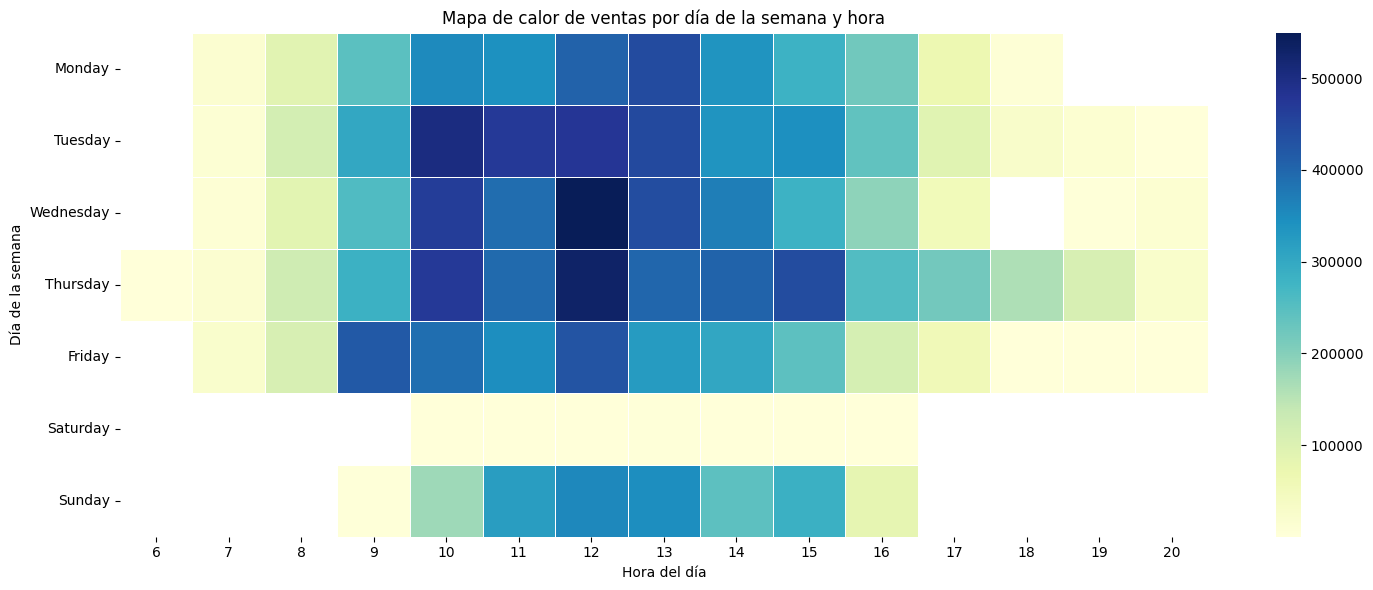

In [ ]:
# 4.- HeatMap
# Copiar el DataFrame
heap_map_df = df.copy()

# Filtrar ventas del primer mes
#heap_map_df = heap_map_df[(heap_map_df['InvoiceDate'] > '2010-12-01') & (heap_map_df['InvoiceDate'] < '2011-01-12')].copy()

# Agregar dias de semana, total (cantidad * precio), hora
heap_map_df.loc[:, 'DiaSemana'] = heap_map_df['InvoiceDate'].dt.day_name()
heap_map_df.loc[:, 'Total'] = heap_map_df['Quantity'] * heap_map_df['Price']
heap_map_df.loc[:, 'Hora'] = heap_map_df['InvoiceDate'].dt.hour

# Crear tabla dinámica
ventas_heatmap = heap_map_df.pivot_table(
    index='DiaSemana',
    columns='Hora',
    values='Total',
    aggfunc='sum'
)

# Reordenar días de la semana
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_heatmap = ventas_heatmap.reindex(orden_dias)

# Graficar el mapa de calor
plt.figure(figsize=(15, 6))
sns.heatmap(ventas_heatmap, cmap='YlGnBu', linewidths=0.5)
plt.title('Mapa de calor de ventas por día de la semana y hora')
plt.xlabel('Hora del día')
plt.ylabel('Día de la semana')
plt.tight_layout()
plt.savefig('heatmap_ventas_semana_hora.png')
plt.show()


#Parte 1: Clasificación de clientes:

In [26]:
#Calcular el precio total
df.loc[:,'Total'] = df['Quantity'] * df['Price']

In [27]:
df.dtypes

,0
Invoice,string[python]
StockCode,string[python]
Description,string[python]
Quantity,int64
InvoiceDate,datetime64[ns]
Price,float64
Customer ID,string[python]
Country,string[python]
Total,float64


In [28]:
df['Total'].describe()

,Total
count,805531.000000
mean,22.026997
std,224.044407
min,0.060000
25%,4.950000
50%,11.850000
75%,19.500000
max,168469.600000


Cliente Premium:


1.   El total de ventas debe ser mayor a: 22 (media)
2.   El país debe ser Reino Unido
3.   Y las transacciones debe ser solo entre semana, ya que son los dias donde se vendio mas.


Cliente Normal:

Cliente que no cumple las anteriores condiciones.



In [ ]:
df.loc[:,'Dia']=df['InvoiceDate'].dt.day_name()

In [ ]:
# Definimos la media
media_total = df['Total'].mean()

# Días de semana
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Creamos la columna 'TipoCliente'
df.loc[:,'TipoCliente'] = df.apply(lambda x: 'Cliente Premium' if (
    x['Total'] > media_total and
    x['Country'] == 'United Kingdom' and
    x['Dia'] in dias_semana
) else 'Cliente Normal', axis=1)

In [ ]:
#ver si la columna InvoiceDate tiene valores nulos
df['TipoCliente'].isnull().sum()

np.int64(0)

In [ ]:
df.groupby('TipoCliente')['Invoice'].count()

,Invoice
TipoCliente,
Cliente Normal,692945
Cliente Premium,112586


In [ ]:
# Columnas utiles
df_clasification = df[['Total', 'Country', 'Dia','Quantity','TipoCliente']]

In [ ]:
#Clasificacion TIPO CLIENTE usando SVM
#Dividir la variable objetivo
X = df_clasification.iloc[:, :-1]
y = df_clasification.iloc[:, -1]

In [ ]:
y

,TipoCliente
0,Cliente Premium
1,Cliente Premium
2,Cliente Premium
3,Cliente Premium
4,Cliente Premium
...,...
805526,Cliente Normal
805527,Cliente Normal
805528,Cliente Normal
805529,Cliente Normal


In [ ]:
# Codificar la variable objetivo
# 1--> Premium
# 0--> Normal
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
y_encoded

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
#Variables categoricas y numericas para transformaciones
categorical_features = ['Country', 'Dia']
numeric_features = ['Total', 'Quantity']

In [ ]:
# Preprocesamiento: escalado + one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # drop='first' evita multicolinealidad
    ]
)

In [ ]:
# Pipeline completo con SVM
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear'))
])

In [ ]:
# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Entrenar modelo
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Total', 'Quantity']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Country', 'Dia'])])),
                ('classifier', SVC(kernel='linear'))])

In [ ]:
# Predecir y evaluar
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

                 precision    recall  f1-score   support

 Cliente Normal       0.98      1.00      0.99    138623
Cliente Premium       1.00      0.90      0.95     22484

       accuracy                           0.99    161107
      macro avg       0.99      0.95      0.97    161107
   weighted avg       0.99      0.99      0.99    161107



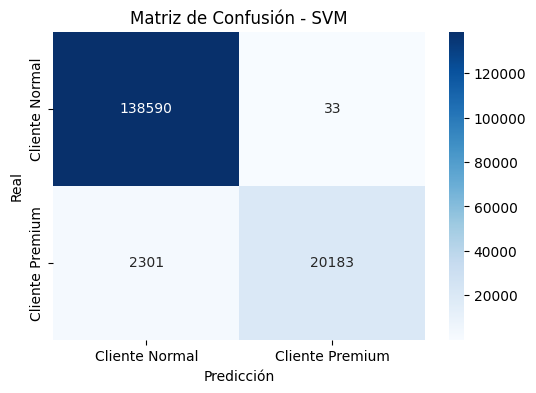

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - SVM')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.savefig('1.1_matriz_confusion_svm.png')
plt.show()

# Parte 2: Segmentación de Cliente

### Agrupamiento K-Means

#### Preprocesamiento de datos

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.isnull().sum()


,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0
Total,0
Dia,0


In [ ]:
#Agrupar Clientes y la suma del valor total
df_customers_total = df.groupby('Customer ID')['Total'].sum().reset_index()
df_customers_total

,Customer ID,Total
0,12346,77556.46
1,12347,5633.32
2,12348,2019.40
3,12349,4428.69
4,12350,334.40
...,...,...
5873,18283,2736.65
5874,18284,461.68
5875,18285,427.00
5876,18286,1296.43


In [ ]:
#Agrupar clientes y ver el numero de veces que visito la tienda
df_customers_frequency = df.groupby('Customer ID')['Invoice'].count().reset_index()
df_customers_frequency

,Customer ID,Invoice
0,12346,34
1,12347,253
2,12348,51
3,12349,175
4,12350,17
...,...,...
5873,18283,986
5874,18284,28
5875,18285,12
5876,18286,67


In [ ]:
#Unir los df anteriores con inner join
df_customers = pd.merge(df_customers_total, df_customers_frequency, on='Customer ID', how='inner')
df_customers

,Customer ID,Total,Invoice
0,12346,77556.46,34
1,12347,5633.32,253
2,12348,2019.40,51
3,12349,4428.69,175
4,12350,334.40,17
...,...,...,...
5873,18283,2736.65,986
5874,18284,461.68,28
5875,18285,427.00,12
5876,18286,1296.43,67


In [ ]:
#Comprobamos que no existan valores nulos
df_customers.isnull().sum()

,0
Customer ID,0
Total,0
Invoice,0


In [ ]:
# Que clientes que no han visitado la tienda durante mucho tiempo y cuáles sí
max_date = df['InvoiceDate'].max()
max_date
df.loc[:,"Recently"] = max_date - df['InvoiceDate']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,Dia,Recently
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,Tuesday,738 days 05:05:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,Tuesday,738 days 05:05:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,Tuesday,738 days 05:05:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,Tuesday,738 days 05:05:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,Tuesday,738 days 05:05:00
...,...,...,...,...,...,...,...,...,...,...,...
805526,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,Friday,0 days 00:00:00
805527,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,Friday,0 days 00:00:00
805528,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,Friday,0 days 00:00:00
805529,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,Friday,0 days 00:00:00


In [ ]:
#Agrupamos por el min de columna anterioridad para ver la hace cuantos dias visito el cliente la tienda
df_dates=df.groupby('Customer ID')['Recently'].min().reset_index()
df_dates["Recently"]=df_dates["Recently"].dt.days
df_dates

,Customer ID,Recently
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309
...,...,...
5873,18283,3
5874,18284,431
5875,18285,660
5876,18286,476


In [ ]:
#Unimos
df_customers = pd.merge(df_customers, df_dates, on='Customer ID', how='inner')
df_customers

,Customer ID,Total,Invoice,Recently
0,12346,77556.46,34,325
1,12347,5633.32,253,1
2,12348,2019.40,51,74
3,12349,4428.69,175,18
4,12350,334.40,17,309
...,...,...,...,...
5873,18283,2736.65,986,3
5874,18284,461.68,28,431
5875,18285,427.00,12,660
5876,18286,1296.43,67,476


In [ ]:
#Verificamos que no existan valores nulos
df_customers.isnull().sum()

,0
Customer ID,0
Total,0
Invoice,0
Recently,0


In [ ]:
#Cambiamos nombres de las columnas
df_customers.columns = ['Customer ID', 'Total', 'Frequency', 'Recently']
df_customers

,Customer ID,Total,Frequency,Recently
0,12346,77556.46,34,325
1,12347,5633.32,253,1
2,12348,2019.40,51,74
3,12349,4428.69,175,18
4,12350,334.40,17,309
...,...,...,...,...
5873,18283,2736.65,986,3
5874,18284,461.68,28,431
5875,18285,427.00,12,660
5876,18286,1296.43,67,476


In [ ]:
#Tamanio del dataset
df_customers.shape

(5878, 4)

In [ ]:
#Escalamiento de datos (Standar Scaler)
scaler = StandardScaler()
df_customers_scaled = scaler.fit_transform(df_customers[['Total', 'Frequency', 'Recently']])

#### Elbow Graph

El gráfico del codo o mas conocido como Elbow Graph es utilizado para obtener el valor adecuado de clusters en el algoritmo K-Means

In [ ]:
# Grafico de el "codo" para encontrar el valor adecuado de clusters (k)
from sklearn.cluster import KMeans
score=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_customers_scaled)
  score.append(kmeans.inertia_)

In [ ]:
len(score)
score

[12953.323206212475,
 7581.899313063211,
 6173.847033142694,
 4531.820531170493,
 3915.966932329938,
 2881.8870560037253,
 2360.7153220326873,
 2115.9181649013963,
 1797.3579779749773]

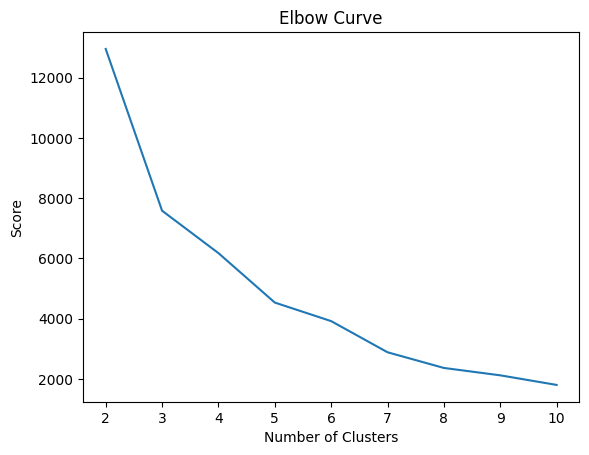

In [ ]:
#graficamos los valores
plt.plot(range(2,11),score)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.savefig('2.1_elbow_curve.png')
plt.show()

#### Silhouette Score

El valor de la silueta es una medida de la similitud de un objeto con su propio cluster (cohesión) en comparación con otros clusters (separación). La silueta oscila entre -1 y +1, donde un valor alto indica que el objeto está bien cohesionado con su propio cluster y mal cohesionado con los clusters vecinos. Si la mayoría de los objetos tienen un valor alto, la configuración de la agrupación es adecuada. Si muchos puntos tienen un valor bajo o negativo, entonces la configuración de clustering puede tener demasiados o muy pocos clusters.'

In [ ]:
from sklearn.metrics import silhouette_score
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_customers_scaled)
  cluster_labels = kmeans.labels_
  silhouette_avg = silhouette_score(df_customers_scaled, cluster_labels)
  print(f"For n_clusters = {i}, the silhouette score is {silhouette_avg}")


For n_clusters = 2, the silhouette score is 0.9579833410501122
For n_clusters = 3, the silhouette score is 0.581292332404368
For n_clusters = 4, the silhouette score is 0.6099025079863309
For n_clusters = 5, the silhouette score is 0.6102896943198577
For n_clusters = 6, the silhouette score is 0.5402810798267147
For n_clusters = 7, the silhouette score is 0.5495898735000586
For n_clusters = 8, the silhouette score is 0.5504470857102338
For n_clusters = 9, the silhouette score is 0.5520691650944668
For n_clusters = 10, the silhouette score is 0.49882243893652445


#### Final Model

A partir del gráfico del codo y además de los valores de  silhouette podemos tomar el valor de k igual a 4 que representa el valor de nuestro número de clusters

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans.fit(df_customers_scaled)
df_customers['Cluster'] = kmeans.labels_
df_customers


,Customer ID,Total,Frequency,Recently,Cluster
0,12346,77556.46,34,325,1
1,12347,5633.32,253,1,3
2,12348,2019.40,51,74,3
3,12349,4428.69,175,18,3
4,12350,334.40,17,309,0
...,...,...,...,...,...
5873,18283,2736.65,986,3,1
5874,18284,461.68,28,431,0
5875,18285,427.00,12,660,0
5876,18286,1296.43,67,476,0


#### Gráficas

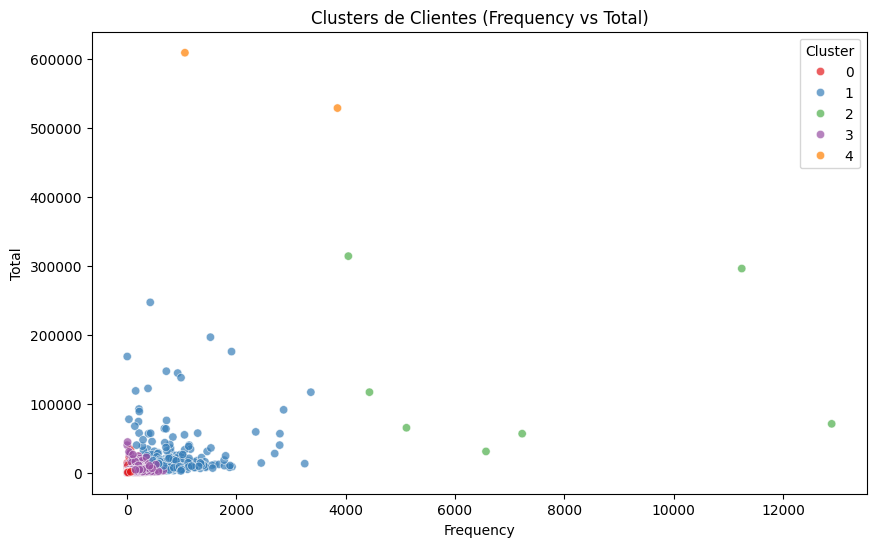

In [ ]:
#Frequency vs Total
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_customers,
    x='Frequency',
    y='Total',
    hue='Cluster',
    palette='Set1',
    alpha=0.7
)
plt.title('Clusters de Clientes (Frequency vs Total)')
plt.xlabel('Frequency')
plt.ylabel('Total')
plt.legend(title='Cluster')
plt.savefig('2.2_clusters_frequency_total.png')
plt.show()


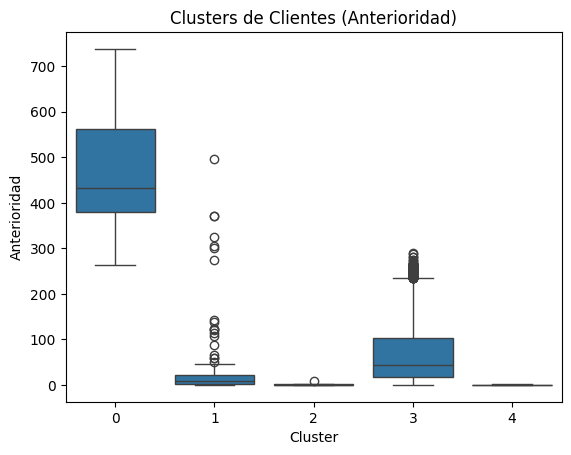

In [ ]:
#Anterioridad
sns.boxplot(data=df_customers, x='Cluster', y='Recently')
plt.title('Clusters de Clientes (Anterioridad)')
plt.xlabel('Cluster')
plt.ylabel('Anterioridad')
plt.savefig('2.2_clusters_recently.png')
plt.show()

### Agrupamiento  Mean Shift

#### Modelo

In [ ]:
meanshift = MeanShift()
meanshift.fit(df_customers_scaled)
df_customers["Cluster_Meanshift"] = meanshift.labels_

In [ ]:
#Numero de cluster
df_customers["Cluster_Meanshift"].unique()

array([ 9,  0,  1,  5, 32, 27,  6,  3,  2, 29,  8, 10, 26, 21, 30,  4, 17,
       25, 14, 22, 11, 31, 13, 15, 34, 20, 23,  7, 19, 35, 33, 16, 18, 24,
       28, 12])

#### Gráfica

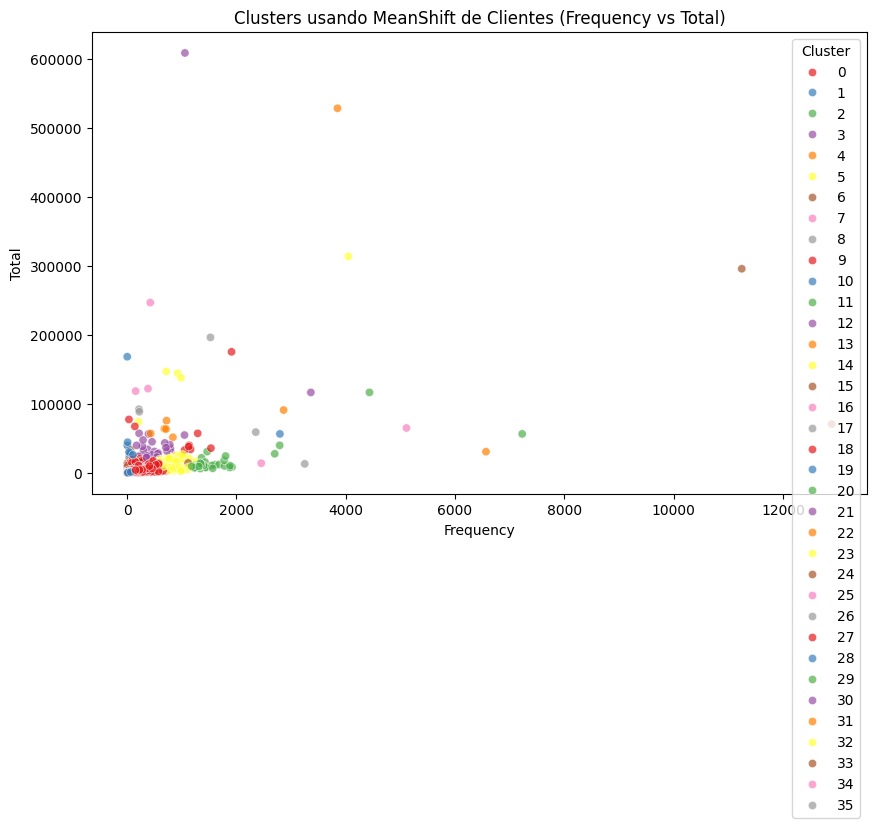

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_customers,
    x='Frequency',
    y='Total',
    hue='Cluster_Meanshift',
    palette='Set1',
    alpha=0.7
)
plt.title('Clusters usando MeanShift de Clientes (Frequency vs Total)')
plt.xlabel('Frequency')
plt.ylabel('Total')
plt.legend(title='Cluster')
plt.savefig('2.3_clusters_mean_shift.png')
plt.show()

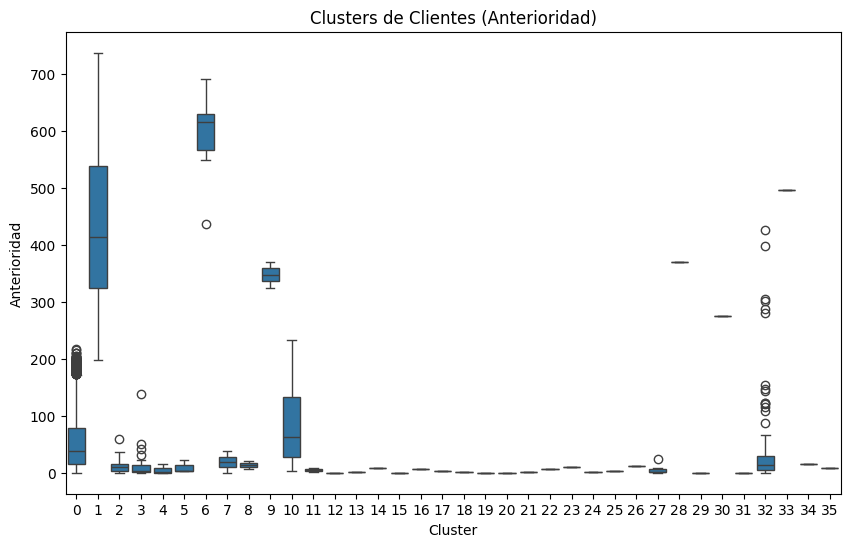

In [ ]:
#Anterioridad
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_customers, x='Cluster_Meanshift', y='Recently')
plt.title('Clusters de Clientes (Anterioridad)')
plt.xlabel('Cluster')
plt.ylabel('Anterioridad')
plt.show()

### Comparación resultados

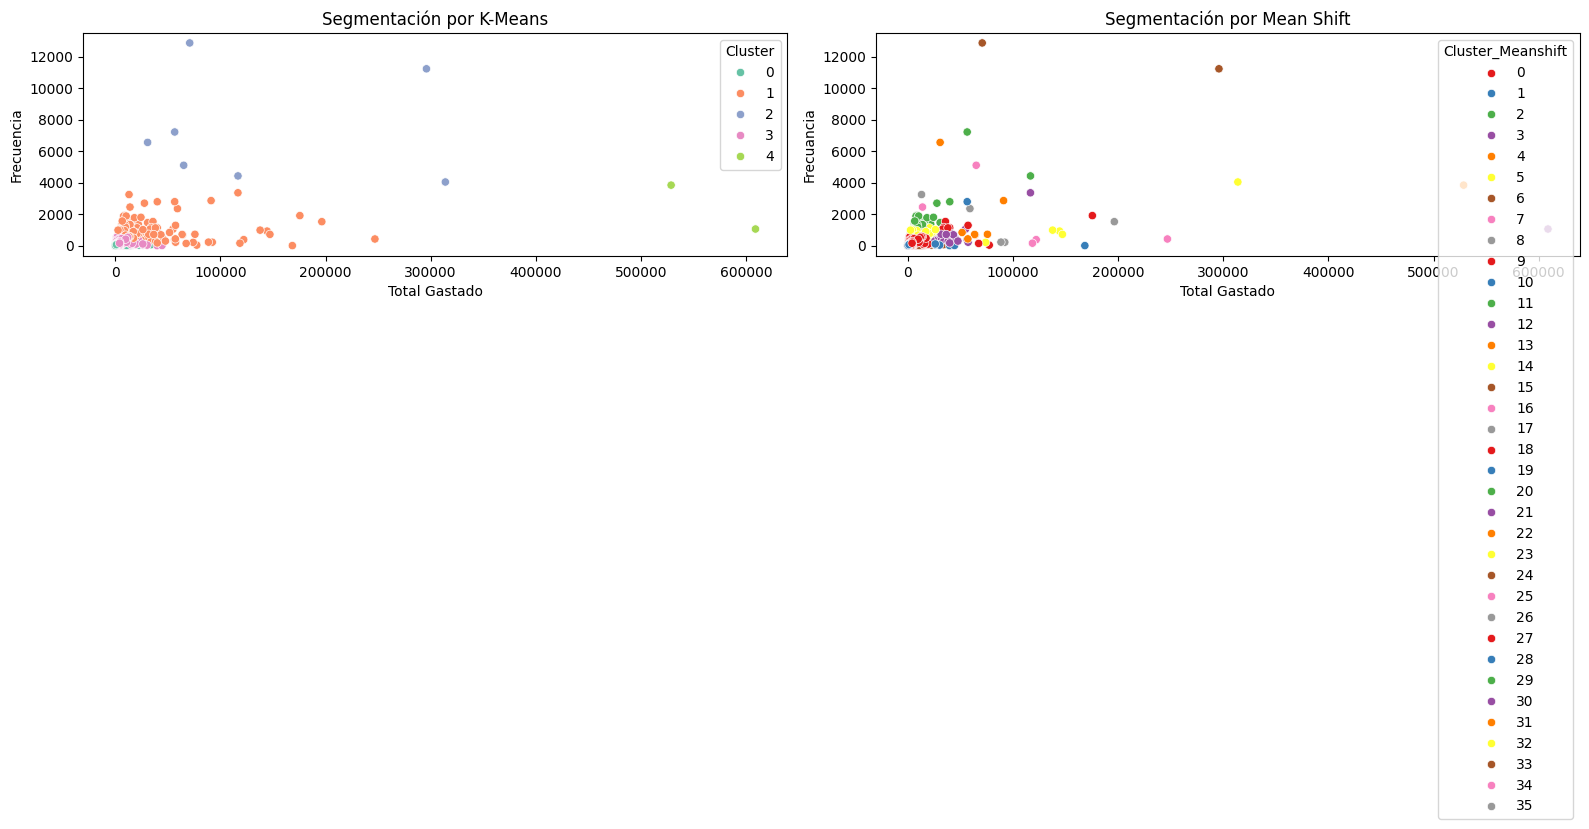

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-Means
sns.scatterplot(data=df_customers, x='Total', y='Frequency',
                hue='Cluster', palette='Set2', ax=axes[0])
axes[0].set_title('Segmentación por K-Means')
axes[0].set_xlabel('Total Gastado')
axes[0].set_ylabel('Frecuencia')

# Mean Shift
sns.scatterplot(data=df_customers, x='Total', y='Frequency',
                hue='Cluster_Meanshift', palette='Set1', ax=axes[1])
axes[1].set_title('Segmentación por Mean Shift')
axes[1].set_xlabel('Total Gastado')
axes[1].set_ylabel('Frecuancia')

plt.tight_layout()
plt.savefig('2.4_comparacion_segmentacion.png')
plt.show()


In [ ]:
max(df_customers["Frequency"])

12890

In [ ]:
#Ver cliente que compro 12890 veces
df_customers[df_customers["Frequency"]==12890]

,Customer ID,Total,Frequency,Recently,Cluster,Cluster_Meanshift
5433,17841,70884.07,12890,1,2,24


In [ ]:
df[df["Customer ID"]=='17841']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,Dia,Recently
4145,489875,79160,HEART SHAPE WIRELESS DOORBELL,11,2009-12-02 15:41:00,2.10,17841,United Kingdom,23.10,Wednesday,736 days 21:09:00
4146,489875,20620,RED SPOTTY PASSPORT COVER,1,2009-12-02 15:41:00,2.10,17841,United Kingdom,2.10,Wednesday,736 days 21:09:00
4147,489875,84750B,BLACK SMALL GLASS CAKE STAND,1,2009-12-02 15:41:00,1.95,17841,United Kingdom,1.95,Wednesday,736 days 21:09:00
4148,489875,21218,RED SPOTTY BISCUIT TIN,1,2009-12-02 15:41:00,3.75,17841,United Kingdom,3.75,Wednesday,736 days 21:09:00
4149,489875,84765,SILVER ROCOCO CANDELABRA,3,2009-12-02 15:41:00,12.75,17841,United Kingdom,38.25,Wednesday,736 days 21:09:00
...,...,...,...,...,...,...,...,...,...,...,...
803069,581334,23399,HOME SWEET HOME HANGING HEART,3,2011-12-08 12:07:00,0.85,17841,United Kingdom,2.55,Thursday,1 days 00:43:00
803070,581334,22893,MINI CAKE STAND T-LIGHT HOLDER,12,2011-12-08 12:07:00,0.42,17841,United Kingdom,5.04,Thursday,1 days 00:43:00
803071,581334,22371,AIRLINE BAG VINTAGE TOKYO 78,1,2011-12-08 12:07:00,4.25,17841,United Kingdom,4.25,Thursday,1 days 00:43:00
803072,581334,22309,TEA COSY RED STRIPE,1,2011-12-08 12:07:00,2.55,17841,United Kingdom,2.55,Thursday,1 days 00:43:00


**1. Cantidad de Clusters**

| Técnica        | Clusters Detectados |
|----------------|---------------------|
| **K-Means**    | 5                   |
| **Mean Shift** | 36                  |

**Interpretación**:
- **K-Means** agrupa los clientes en un número fijo de clusters (definido manualmente). En nuestro caso fue igual a 5 ya que nos apoyamos tanto en el grafico del codo como el el valor de Silhouette. Esta técnica es ideal cuando se tiene una idea previa del número de segmentos.
- **Mean Shift** determina automáticamente el número de clusters según la densidad de los datos, lo que puede generar muchos clusters si hay variabilidad como es nuestro caso en donde se crearon muchos clusters sin embargo el tiempo empleado con esta técnica no fue muy grande.

---

**2. Distribución de los Clientes**

- **K-Means**:
  - Agrupa bien a la mayoría de los clientes en un **grupo denso**.
  - Separa a los grandes compradores (alto gasto y frecuencia) en clusters más pequeños.
  - Los clusters son **más balanceados** y fáciles de interpretar. Por ejemplo podríamos ver que clientes son de tipo promedio, VIP u otros.

- **Mean Shift**:
  - Identifica muchos **clusters pequeños**, especialmente para clientes con comportamientos únicos.
  - Tiende a **sobresegmentar**, podría ser útil si se busca segmentación fina o detección de *outliers*.

---

**3. Ventajas y Desventajas**

| Técnica        | Ventajas                                               | Desventajas                                      |
|----------------|--------------------------------------------------------|--------------------------------------------------|
| **K-Means**    | Rápido, simple, interpretable, ideal si conoces `k`   | Debemos definir `k`, basado en otras técnicas como las mencionadas anterioremente |
| **Mean Shift** | No requiere `k`, descubre clusters automáticamente     | Lento debido a su generación automática de clusters, puede generar **demasiados** clusters      |


# Parte 3: Predicción de Ventas

In [30]:
df.drop(columns=['Recently'], inplace=True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
805526,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
805527,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
805528,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
805529,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


In [31]:
df["Description"].nunique()

5239

## Recategorización y creación de nuevas variables

In [32]:
# Mes y Año
df.loc[:,'Month'] = df['InvoiceDate'].dt.month
df.loc[:,'Year'] = df['InvoiceDate'].dt.year

In [33]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,Month,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,12,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,12,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,12,2009


In [35]:
# Estación basada en el mes
#Winter-> Invierno
#Spring-> Primavera
#Summer-> Verano
#Fall-> Otoño
def obtener_estacion(mes):
    if mes in [12, 1, 2]:
        return 'Winter'
    elif mes in [3, 4, 5]:
        return 'Spring'
    elif mes in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df.loc[:,'Season'] = df['Month'].apply(obtener_estacion)

In [36]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,Month,Year,Season
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,12,2009,Winter
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,2009,Winter
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,2009,Winter
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,12,2009,Winter
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,12,2009,Winter


In [39]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0
Total,0
Month,0


In [40]:
# Categorización básica de productos buscando palabras claves en la columna Description
def clasificar_producto(desc):
    if 'LIGHT' in desc:
        return 'LIGHTING'
    elif 'BAG' in desc:
        return 'BAGS'
    elif 'MUG' in desc:
        return 'MUGS'
    elif 'CARD' in desc:
        return 'CARDS'
    elif 'BOX' in desc:
        return 'BOXES'
    elif 'DOLLY' in desc:
        return 'TOYS'
    else:
        return 'OTHERS'

df.loc[:,'Category'] = df['Description'].apply(clasificar_producto)

In [41]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,Month,Year,Season,Category
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,12,2009,Winter,LIGHTING
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,2009,Winter,LIGHTING
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,2009,Winter,LIGHTING
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,12,2009,Winter,OTHERS
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,12,2009,Winter,BOXES


In [42]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0
Total,0
Month,0


## División en conjunto de entrenamiento y prueba

In [44]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Total', 'Month', 'Year', 'Season',
       'Category'],
      dtype='object')

In [45]:
# Codificación de variables categóricas utilizando ONE-HOT ENCODER
df_encoded = pd.get_dummies(df[['Quantity', 'Price', 'Month', 'Year', 'Season', 'Category', 'Country']], drop_first=True)
X = df_encoded
y = df['Total']

# División
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Definición de modelo y entrenamiento


In [47]:
# Modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

## Evaluación

In [52]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 0.58
RMSE: 116.50
R² Score: 0.74


El **MAE** o Mean Absolute Error, es el promedio de los errores absolutos entre los valores reales y los predichos. En promedio, nuestras predicciones se desvían 0.58 unidades monetarias del valor real.

El **RMSE** o Root Mean Squared Error, es la raíz cuadrada del error cuadrático medio. Penaliza más los errores grandes. En nuestro caso, el error promedio, teniendo en cuenta su magnitud, es de aproximadamente 116.50 unidades monetarias. El RMSE parece alto, pero depende de la escala de la variable objetivo que en nuestro caso es **Total**. Este valor sugiere que hay algunos valores atípicos (outliers) que están generando errores grandes, esto puede ser una señal para explorar:



*   Filtrar transacciones extremadamente caras o inusuales.
*   Transformar la variable objetivo (Total) utilizando una transformación logarítmica para suavizar valores extremos.


El **R²** o Coeficiente de Determinación, mide qué proporción de la varianza de los datos está explicada por el modelo. El valor de este coeficiente varia entre 1 y 0, un valor cercano a 1 indica un ajuste perfecto. En nuestro caso tenemos un valor de 0.74 lo que significa que el modelo explica el 74% de la variabilidad en los valores de venta.

In [53]:
#Guardar el modelo
import joblib
joblib.dump(model, 'modelo_prediccion_ventas.pkl')

['modelo_prediccion_ventas.pkl']

## Importancia de las variables

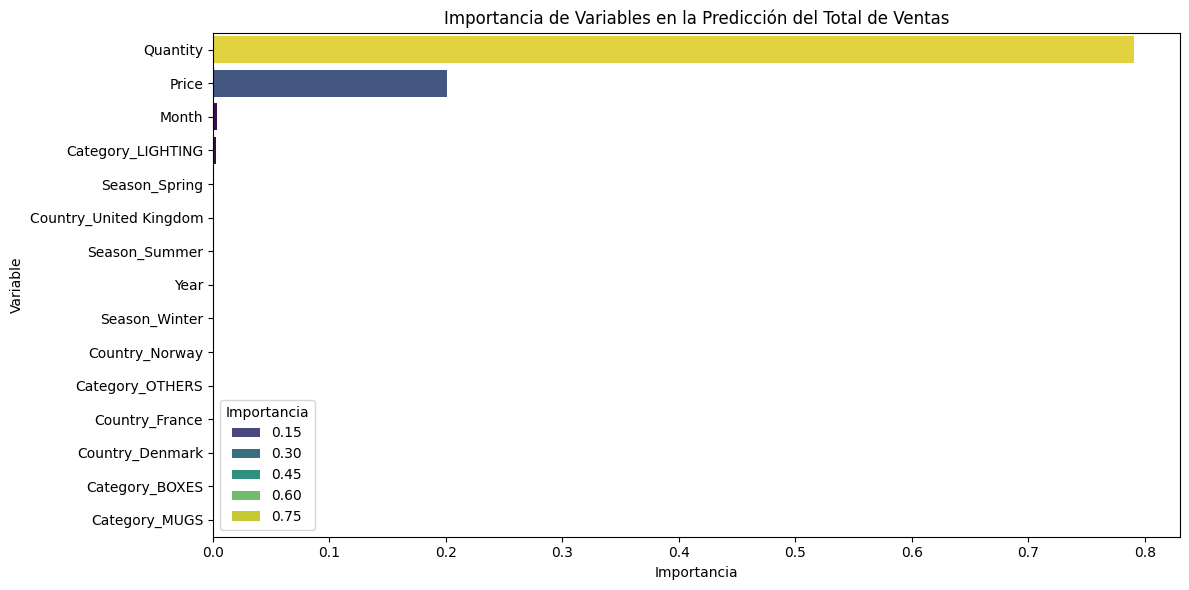

In [56]:
# Extraer las importancias
importancias = model.feature_importances_
nombres_columnas = X.columns

# DataFrame con importancias
df_importancia = pd.DataFrame({
    'Variable': nombres_columnas,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Mostrar top 15
plt.figure(figsize=(12, 6))
sns.barplot(data=df_importancia.head(15), x='Importancia', y='Variable', hue="Importancia", palette='viridis')
plt.title('Importancia de Variables en la Predicción del Total de Ventas')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.savefig('3.1_importancia_variables.png')
plt.show()
